In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from shutil import rmtree
from joblib import Memory
import csv

In [ ]:
# empty entry to 0
# Open the input CSV file and read its contents
with open('cleaned_file_hourly.csv', 'r') as input_file:
    reader = csv.reader(input_file)
    data = [row for row in reader]

# Iterate over each row and each column, replacing empty values with 0
for i in range(len(data)):
    for j in range(len(data[i])):
        if data[i][j] == '':
            data[i][j] = '0'

# Write the modified data to a new CSV file
with open('cleaned_file_hourly.csv', 'w', newline='') as output_file:
    writer = csv.writer(output_file)
    writer.writerows(data)

In [ ]:
df = pd.read_csv('hourly_fitbit_sema_df_unprocessed.csv')
train_attributes = ['id', 'date', 'hour', 'gender', 'age', 'bmi', 'steps','step_goal']
df = df[train_attributes]

# Remove the rows where at least one of the attribute values is empty
# df.dropna(how='any', inplace=True)

# Save the updated DataFrame to a new CSV file
df.to_csv('cleaned_file_hourly.csv', index=False)

In [ ]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].unique().tolist()

In [ ]:
import re
# Replace values in each column
replacement_values = {
    "gender": {"MALE": 1, "FEMALE": 0},
    "age": {"<30": 0, ">=30": 1}
}
def extract_numbers(value):
    return int(re.search(r'\d+', str(value))[0])

df['bmi'] = df['bmi'].apply(extract_numbers)
for col, values in replacement_values.items():
    df[col].replace(values, inplace=True)

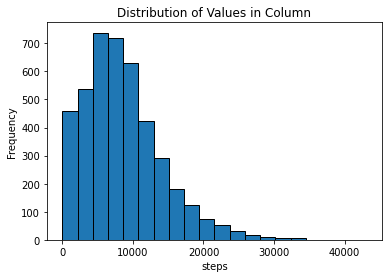

In [ ]:
plt.hist(df['steps'], bins=20, edgecolor='black')
plt.xlabel('steps')
plt.ylabel("Frequency")
plt.title("Distribution of Values in Column")
plt.show()

In [ ]:
pct_10 = int(len(df) * 0.1)
sorted_df = df.sort_values(by='steps')
df = sorted_df[pct_10:-pct_10]
df = df[df['steps'] >= 5000]

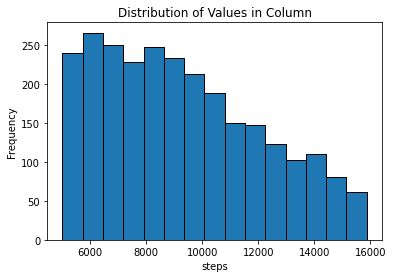

In [ ]:
plt.hist(df['steps'], bins=15, edgecolor='black')
plt.xlabel('steps')
plt.ylabel("Frequency")
plt.title("Distribution of Values in Column")
plt.show()

In [ ]:
df['steps'].max()

15877.0

In [ ]:
bins = np.linspace(df['steps'].min(), df['steps'].max(), 5)
labels = [6000, 8000, 10000, 12000]
df['steps'] = pd.cut(df['steps'], bins, labels=labels, include_lowest=True)


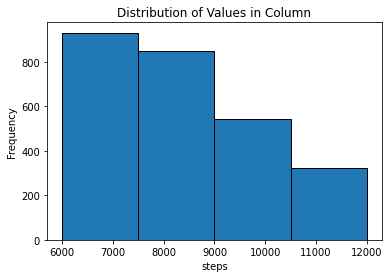

In [ ]:
plt.hist(df['steps'], bins=4, edgecolor='black')
plt.xlabel('steps')
plt.ylabel("Frequency")
plt.title("Distribution of Values in Column")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
x_train = train[['gender', 'age', 'bmi']]
y_train = train[['steps']]
x_test = test[['gender', 'age', 'bmi']]
y_test = test[['steps']]

In [ ]:
cls_svm = svm.SVC(kernel='linear', C=100, random_state=42)
pred_svm = cls_svm.fit(x_train, y_train).predict(x_test)
accuracy_score(y_test, pred_svm)

0.3799621928166352

In [ ]:
cls_nb = GaussianNB()
pred_nb= cls_nb.fit(x_train, y_train).predict(x_test)
accuracy_score(y_test, pred_nb)

0.3686200378071834

In [ ]:
# get another csv file for swift
df = pd.read_csv('cleaned_file.csv')

# Define the four closest values
four_class = [6000, 8000, 10000, 12000]
five_class = [6000, 8000, 10000, 12000, 14000]

# Function to change a number to the closest value
def closest_value(x, values):
    return min(values, key=lambda v: abs(v - x))

# Apply the function to the label column
df['steps'] = df['steps'].apply(lambda x: closest_value(x, five_class))

# Save the updated DataFrame to a new CSV file
df.to_csv('steps_five_class.csv', index=False)
